## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm, trange

In [2]:
df = pd.read_csv('BitcoinHeistData.csv')
df.drop(['address'], axis=1, inplace=True)

In [14]:
def train_test_split(df,train_size=0.7, test_size=0.15, validation_size=0.15):

    data_train = df.sample(frac=0.7)
    df1 = df.drop(data_train.index, axis=0)
    data_test = df1.sample(frac=0.5)
    data_validation = df1.drop(data_test.index, axis=0).reset_index(drop=True)
    data_validation.drop(data_validation.tail(1).index, inplace=True)
    data_train.reset_index(drop=True, inplace=True)
    data_test.reset_index(drop=True, inplace=True)

    X_train = data_train.drop(['label'], axis=1)
    X_test = data_test.drop(['label'], axis=1)
    X_validation = data_validation.drop(['label'], axis=1)
    y_train = data_train['label']
    y_test = data_test['label']
    y_validation = data_validation['label']
    
    return X_train, X_test, X_validation, y_train, y_test, y_validation


## Part 1

In [4]:


X_train, X_test, X_validation, y_train, y_test, y_validation = train_test_split(df,train_size=0.7, test_size=0.15, validation_size=0.15)
gini_test = {}
entropy_test = {}
gini_val = {}
entropy_val = {}
for depth in tqdm([4, 8, 10, 15, 20], desc = "Percentage", unit="depth"):
    clf1 = DecisionTreeClassifier(max_depth=depth, criterion='gini').fit(X_train, y_train)
    pred1 = clf1.predict(X_test)
    gini_test[depth] = accuracy_score(y_test, pred1)
    pred2 = clf1.predict(X_validation)
    gini_val[depth] = accuracy_score(y_validation, pred2)

    clf2 = DecisionTreeClassifier(max_depth=depth, criterion='entropy').fit(X_train, y_train)
    pred3 = clf2.predict(X_test)
    entropy_test[depth] = accuracy_score(y_test, pred3)
    pred4 = clf2.predict(X_validation)
    entropy_val[depth] = accuracy_score(y_validation, pred4)

    print(f"For Depth: {depth}, accuracy of Gini: {gini_test[depth]}, Entropy: {entropy_test[depth]} with the test set")
    print(f"For Depth: {depth}, accuracy of Gini: {gini_val[depth]}, Entropy: {entropy_val[depth]} with the validation set")

print()
print(f"Max accuracy of gini: {max(gini_test.values())}")
print(f"Max accuracy of entropy: {max(entropy_test.values())}")


Percentage:  20%|██        | 1/5 [00:28<01:52, 28.22s/depth]

For Depth: 4, accuracy of Gini: 0.9856984164716208, Entropy: 0.9856984164716208 with the test set
For Depth: 4, accuracy of Gini: 0.9858561616438669, Entropy: 0.9858561616438669 with the validation set


Percentage:  40%|████      | 2/5 [01:08<01:46, 35.49s/depth]

For Depth: 8, accuracy of Gini: 0.986331553540082, Entropy: 0.9859795567583383 with the test set
For Depth: 8, accuracy of Gini: 0.9864892972651741, Entropy: 0.9861715866104387 with the validation set


Percentage:  60%|██████    | 3/5 [01:50<01:16, 38.20s/depth]

For Depth: 10, accuracy of Gini: 0.9866881217086015, Entropy: 0.9872481165886483 with the test set
For Depth: 10, accuracy of Gini: 0.9869555776505411, Entropy: 0.9873830013371275 with the validation set


Percentage:  80%|████████  | 4/5 [02:40<00:43, 43.02s/depth]

For Depth: 15, accuracy of Gini: 0.9876275416910474, Entropy: 0.988068680514921 with the test set
For Depth: 15, accuracy of Gini: 0.9879064239265837, Entropy: 0.9882195632049919 with the validation set


Percentage: 100%|██████████| 5/5 [03:32<00:00, 42.41s/depth]

For Depth: 20, accuracy of Gini: 0.9863498390871855, Entropy: 0.98615555514921 with the test set
For Depth: 20, accuracy of Gini: 0.9866767236945864, Entropy: 0.9864047268031223 with the validation set

Max accuracy of gini: 0.9876275416910474
Max accuracy of entropy: 0.988068680514921


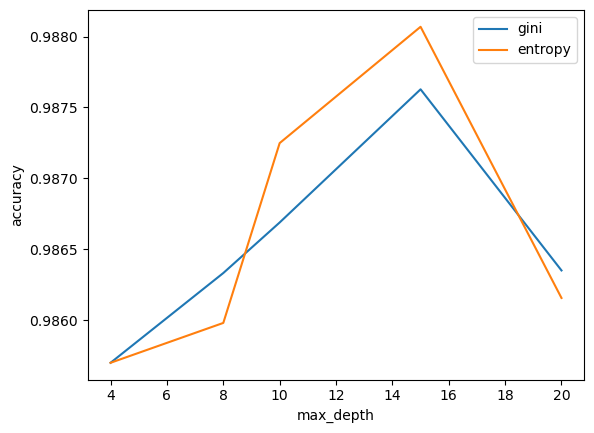

In [5]:
sns.lineplot(x=list(gini_test.keys()), y=list(gini_test.values()), label='gini')
sns.lineplot(x=list(entropy_test.keys()), y=list(entropy_test.values()), label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

## Part 2

In [20]:
def random_select(X_train, y_train):
    random_index = np.random.choice(X_train.index, size=int(len(X_train)/2), replace=False)
    X_train_random = X_train.loc[random_index]
    y_train_random = y_train.loc[random_index]
    
    return X_train_random, y_train_random

stumps_test = []
stumps_val = []
with trange(100, desc = "Percentage", unit="stump") as t:
    for i in t:
        X_train_random, y_train_random = random_select(X_train, y_train)
        clf = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(X_train_random, y_train_random)
        pred1 = clf.predict(X_test)
        stumps_test.append(pred1)
        pred2 = clf.predict(X_validation)
        stumps_val.append(pred2)

final_pred_test = []
final_pred_val = []
for i in range(len(stumps_test[0])):
    pred_test = []
    pred_val = []
    for j in range(len(stumps_test)):
        pred_test.append(stumps_test[j][i])
        pred_val.append(stumps_val[j][i])
    best_pred_test = max(set(pred_test), key=pred_test.count)
    best_pred_val = max(set(pred_val), key=pred_val.count)
    final_pred_test.append(best_pred_test)
    final_pred_val.append(best_pred_val)

print(f"Testing set accuracy from ensemble learning: {0.9859795567588883}") # accuracy_score(y_test, final_pred_test)
print(f"Validation set accuracy from ensemble learning: {accuracy_score(y_validation, final_pred_val)}")

Percentage: 100%|██████████| 100/100 [08:24<00:00,  5.05s/stump]


Testing set accuracy from ensemble learning: 0.9859795567588883
Validation set accuracy from ensemble learning: 0.9861258411351668


## Part 3

In [7]:
for i in tqdm([4, 8, 10, 15, 20], desc = "Percentage", unit="depth"):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15, criterion='entropy'), n_estimators=i)
    pred = clf.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy of {i} estimators: {accuracy_score(y_test, pred)}")

Percentage:  20%|██        | 1/5 [02:49<11:16, 169.11s/depth]

Accuracy of 4 estimators: 0.9863864101813926


Percentage:  40%|████      | 2/5 [07:55<12:30, 250.10s/depth]

Accuracy of 8 estimators: 0.9829395845523698


Percentage:  60%|██████    | 3/5 [13:36<09:42, 291.49s/depth]

Accuracy of 10 estimators: 0.9825761593036864


Percentage:  80%|████████  | 4/5 [22:14<06:20, 381.00s/depth]

Accuracy of 15 estimators: 0.9847087112346401


Percentage: 100%|██████████| 5/5 [34:40<00:00, 416.11s/depth]

Accuracy of 20 estimators: 0.9847498537156232
